In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
data = np.load('data_train.npy')
labels = np.load('labels_train.npy')
data = data.astype('uint8')
data.shape

label_map = [
    'Nike',
    'Adidas',
    'Ford',
    'Honda',
    'General Mills',
    'Unilever',
    'McDonalds',
    'KFC',
    'Gator',
    '3M'
]

num_classes = len(label_map)

In [5]:
model_handle_map = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/classification/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/classification/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/classification/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/classification/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/classification/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/classification/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/classification/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/classification/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/classification/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/classification/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/classification/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/classification/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/classification/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/classification/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/classification/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/classification/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/classification/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/classification/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/classification/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/classification/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/classification/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/classification/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/classification/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/classification/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/classification/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/classification/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/classification/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/classification/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/classification/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/ilsvrc2012_classification/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/classification/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/classification/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/classification/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/classification/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/classification/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/classification/4",
  # "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/classification/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/classification/4",
  # "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/classification/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/classification/5",
  # "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5",
  # "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/classification/5",
}

model_image_size_map = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300, 
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "mobilenet_v2_100_224": 224,
  "mobilenet_v2_130_224": 224,
  "mobilenet_v2_140_224": 224,
  "nasnet_large": 331,
  "nasnet_mobile": 224,
  "pnasnet_large": 331,
  "resnet_v1_50": 224,
  "resnet_v1_101": 224,
  "resnet_v1_152": 224,
  "resnet_v2_50": 224,
  "resnet_v2_101": 224,
  "resnet_v2_152": 224,
  "mobilenet_v3_small_100_224": 224,
  "mobilenet_v3_small_075_224": 224,
  "mobilenet_v3_large_100_224": 224,
  "mobilenet_v3_large_075_224": 224,
}

In [6]:
# Reshape the data back to 300x300x3
# Output is (num_samples, 300, 300, 3)
data = data.T
data.shape

(5933, 270000)

In [7]:
# Split data into train and test
X_train, X_test, t_train, t_test = train_test_split(data, labels, stratify=labels, test_size=0.2, random_state=42)

In [8]:
model_handle = 'efficientnetv2-s'

In [9]:
SHAPE = (300, 300, 3)
NUM_EPOCHS = 100

def train(model_handle):
    print('Loading model...')
    # Pre trained model to extract features
    feature_extractor_layer = hub.KerasLayer(
      model_handle_map[model_handle],
      input_shape=SHAPE,
      trainable=True
    )

    # Attach classification layer 
    model = tf.keras.Sequential([
      tf.keras.layers.Reshape(SHAPE, input_shape=X_train[0].shape),
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    print('Compiling model...')
    model.compile(
      optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['acc'])

    log_dir = "{}/logs/fit/".format(model_handle) + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1) # Enable histogram computation for every epoch.

    checkpoint_filepath = "{}/checkpoints/".format(model_handle)
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        monitor='val_loss',
        mode='min',
        save_best_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

    print('Training model...')
    # Fit model, use 20 percent of training dat as validation data
    history = model.fit(X_train,
                        t_train,
                        validation_split=0.2,
                        epochs=NUM_EPOCHS,
                        callbacks=[tensorboard_callback, early_stopping, model_checkpoint_callback])
    
    # Load best model from training
    saved_model = tf.keras.models.load_model(checkpoint_filepath)

    # Evaluate model
    loss, acc = saved_model.evaluate(X_test, t_test, verbose=1)
    
    # Write the accuracy and loss to a file
    with open("{}/{}_results.txt".format(model_handle, model_handle),"w") as f:
        f.write("Test Loss: {} ------- Test Accuracy: {}\n".format(loss, acc))
    
    # Save a confusion matrix
    preds = np.argmax(saved_model.predict(X_test), axis=-1)
    ConfusionMatrixDisplay(confusion_matrix(t_test, preds)).plot()
    plt.savefig('{}/confusion_matrix.png'.format(model_handle))
    
    # Explicitly delete variables to hopefully conserve memory
    del feature_extractor_layer, model, log_dir, checkpoint_filepath, model_checkpoint_callback, early_stopping, history, saved_model, loss, acc, \
    preds
    gc.collect()
    

Loading model...


2023-08-09 23:53:03.331568: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-09 23:53:03.860517: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0


Compiling model...
Training model...
Epoch 1/100


2023-08-09 23:53:23.950018: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-08-09 23:53:26.274819: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


119/119 [==============================] - ETA: 0s - loss: 0.5093 - acc: 0.8583

2023-08-09 23:53:52.785933: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: efficientnetv2-s/checkpoints/assets


INFO:tensorflow:Assets written to: efficientnetv2-s/checkpoints/assets


119/119 [==============================] - 52s 301ms/step - loss: 0.5093 - acc: 0.8583 - val_loss: 0.3053 - val_acc: 0.9284
Epoch 2/100
119/119 [==============================] - ETA: 0s - loss: 0.2643 - acc: 0.9257

INFO:tensorflow:Assets written to: efficientnetv2-s/checkpoints/assets


INFO:tensorflow:Assets written to: efficientnetv2-s/checkpoints/assets


119/119 [==============================] - 33s 277ms/step - loss: 0.2643 - acc: 0.9257 - val_loss: 0.2645 - val_acc: 0.9295
Epoch 3/100
119/119 [==============================] - ETA: 0s - loss: 0.2050 - acc: 0.9405

INFO:tensorflow:Assets written to: efficientnetv2-s/checkpoints/assets


INFO:tensorflow:Assets written to: efficientnetv2-s/checkpoints/assets


119/119 [==============================] - 34s 283ms/step - loss: 0.2050 - acc: 0.9405 - val_loss: 0.1865 - val_acc: 0.9484
Epoch 4/100
119/119 [==============================] - 20s 167ms/step - loss: 0.1316 - acc: 0.9607 - val_loss: 0.2877 - val_acc: 0.9305
Epoch 5/100
119/119 [==============================] - 20s 167ms/step - loss: 0.1193 - acc: 0.9694 - val_loss: 0.2504 - val_acc: 0.9368
Epoch 6/100
38/38 [==============================] - 3s 44ms/step - loss: 0.1746 - acc: 0.9511


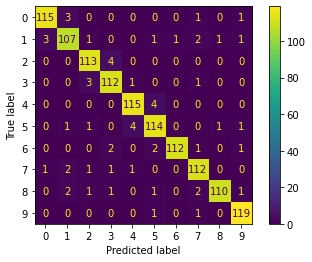

In [10]:
train(model_handle)